In [1]:
# Base Module of data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
# Model library
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LinearRegression
#from sklearn.naive_bayes import GaussianNB, 
#from sklearn.naive_bayes import BernoulliNB, MultinomialNB
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import LinearSVC

In [3]:
# Load data
file_name = "Iris_Data.csv"
#path_mac = "./data/"
path_win = "\\data\\"

file_path = path_mac + file_name
file_path = path_win + file_name

data = pd.read_csv(file_path, sep=',')
# Split data & y_data
x_data = data.drop(data.columns[len(data.columns)-1], axis=1)
y_data = data[data.columns[len(data.columns)-1]]

In [4]:
# Models Select one of the list
# Ex) Decision Tree Classifier
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [5]:
# Data Processing

# Split as train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

In [6]:
# Train
model = model.fit(x_train, y_train)
# Test
prediction = model.predict(x_test)

F-Score: 0.933
Accuracy:  0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.75      1.00      0.86         6
 Iris-virginica       1.00      0.80      0.89        10

    avg / total       0.95      0.93      0.93        30



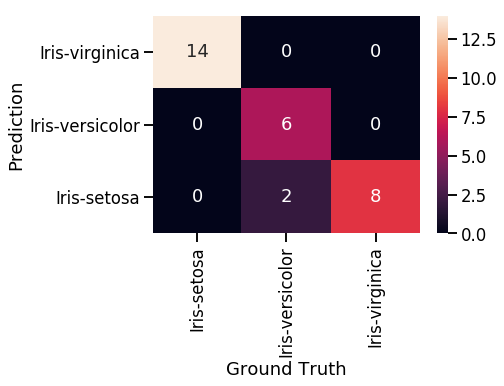

In [7]:
# Check Result
p,r,f,s = precision_recall_fscore_support(y_test, prediction, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

labels = sorted(y_test.unique())
chart = pd.DataFrame(confusion_matrix(y_test, prediction),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');

In [8]:
# Refer Model save & Load
path = "./model/JunhyuckWoo/"
model_name = "20181116_decision_tree"
joblib.dump(model, path+model_name + ".pkl")

['./model/JunhyuckWoo/20181116_decision_tree.pkl']